### Testing Use of GloVe vs BERT embeddings on Divergent Association Task

In [ ]:
import os
print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))
from embeddings import BERT_WordEmbeddings_L6, BERT_WordEmbeddings_L7, GloVe, FastTextEmbeddings, Word2VecEmbeddings, GraniteMultilingualEmbeddings
from embeddings import BERT_Encoder_L6, BERT_Encoder_L7
from embeddings import SBERT_Encoder
import numpy as np
import tqdm
from utils import *

/Users/greencode/Documents/Code/MCTB/testing
/Users/greencode/Documents/Code/MCTB


/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
low = ["arm", "eyes", "feet", "hand", "head", "leg", "body"]
average = ["bag", "bee", "burger", "feast", "office", "shoes", "tree"]
high = ["hippo", "jumper", "machinery", "prickle", "tickets", "tomato", "violin"]

In [3]:
glove = GloVe()
bert_l6_word = BERT_WordEmbeddings_L6()
bert_l7_word = BERT_WordEmbeddings_L7()
bert_l6 = BERT_Encoder_L6()
bert_l7 = BERT_Encoder_L7()
fastText_model = FastTextEmbeddings(model="./models/cc.en.300.bin")
word2Vec_model = Word2VecEmbeddings(model="./models/GoogleNews-vectors-negative300.bin", binary=True)
ibm_granite_model = GraniteMultilingualEmbeddings()
sbert = SBERT_Encoder()

Initializing GloVe


2196018it [00:15, 139932.29it/s]


Initializing BERT_WordEmbeddings_L6
Initializing BERT_WordEmbeddings_L7
Initializing BERT_ENCODER_L6
Initializing BERT_ENCODER_L7
Initializing FastTextEmbeddings
Initializing Word2VecEmbeddings
Initializing GraniteMultilingualEmbeddings
Initializing SBERT_Encoder


In [4]:
def test_words(model, low, average, high):
    print(f"Testing {model} Model")
    print(f"Low Average Words: {float(calculate_dat_score(model, low))}")
    print(f"Average Average Words: {float(calculate_dat_score(model, average))}")
    print(f"High Average Words: {float(calculate_dat_score(model, high))}")
    print()

In [5]:
test_words(glove, low, average, high)
test_words(bert_l6_word, low, average, high)
test_words(bert_l7_word, low, average, high)
test_words(bert_l6, low, average, high)
test_words(bert_l7, low, average, high)
test_words(fastText_model, low, average, high)
test_words(word2Vec_model, low, average, high)
test_words(ibm_granite_model, low, average, high)

Testing GloVe Model
Low Average Words: 50.30972872461591
Average Average Words: 77.90473649899164
High Average Words: 95.22475562102738

Testing BERT_WordEmbeddings_L6 Model
Low Average Words: 33.00951385498047
Average Average Words: 39.8325309753418
High Average Words: 52.41023254394531

Testing BERT_WordEmbeddings_L7 Model
Low Average Words: 33.0512809753418
Average Average Words: 39.22274398803711
High Average Words: 53.54759216308594

Testing BERT_ENCODER_L6 Model
Low Average Words: 33.009521484375
Average Average Words: 39.832584381103516
High Average Words: 52.41026306152344

Testing BERT_ENCODER_L7 Model
Low Average Words: 33.051300048828125
Average Average Words: 39.22279357910156
High Average Words: 53.54761505126953

Testing FastTextEmbeddings Model
Low Average Words: 64.75069047439665
Average Average Words: 84.17174245807387
High Average Words: 87.71192899772099

Testing Word2VecEmbeddings Model
Low Average Words: 73.55577218390647
Average Average Words: 87.22480120403426
Hi

In [6]:
test_words(sbert, low, average, high)

Testing SBERT_Encoder Model
Low Average Words: 52.85286023503259
Average Average Words: 69.57615074657258
High Average Words: 77.00771717798143



### Test with real human responses

In [7]:
# Words I randomly found in the original DAT study that had high score
low_human = ["fast", "slow", "up", "down", "across", "near", "far", "full", "empty", "still"]
average_human = ["chicken", "door", "pants", "heater", "dancing", "grass", "lemons", "shoe", "cloud", "fear"]
high_human = ["brumby", "kite", "mine", "author", "mile", "crime", "cantelope", "hull", "tree", "treacle"]

In [8]:
print("Testing GloVe Model with Human responses")
print(f"Low Average Words: {float(calculate_dat_score(glove, low_human))}")
print(f"Average Average Words: {float(calculate_dat_score(glove, average_human))}")
print(f"High Average Words: {float(calculate_dat_score(glove, high_human))}")

Testing GloVe Model with Human responses
Low Average Words: 54.90939166810777
Average Average Words: 78.62956344253487
High Average Words: 91.04346153843734


### Test with all responses from original DAT paper

In [9]:
import pandas as pd
study1a = pd.read_csv("test/DATpaper/study1a.tsv", sep='\t')
study1b = pd.read_csv("test/DATpaper/study1b.tsv", sep='\t')
study2 = pd.read_csv("test/DATpaper/study2.tsv", sep='\t')

In [10]:
study2

,id,age,gender,country,multilingual,aut.originality.1,aut.originality.2,aut.originality,dat,problems.questions.1,...,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10
0,R_OCfAxZo5M0SxNMB,35,Female,Australia,True,NaN,NaN,NaN,83.030700,NaN,...,copper,insect,volcano,trolley,goblet,dog,traffic light,earring,tomb,planet
1,R_1ir4JlMoEeQzoVo,35,Male,Australia,False,NaN,NaN,NaN,80.903128,NaN,...,apple,brick,water,air,star,leg,spanner,typewriter,wall,whale
2,R_1gHhDldnPSA4GDT,18,NaN,NaN,NaN,NaN,NaN,NaN,68.284609,NaN,...,weapon,beach,sky,wind,fire,dragon,cloak,book,fruit,cup
3,R_2ahjZT3xEElN5Da,35,Male,Australia,False,NaN,NaN,NaN,73.696206,NaN,...,ball,nail,rose,stone,sea,fly,relax,sweat,hunger,scorpion
4,R_bEHztu6LDU2uL0R,35,Female,Australia,False,0.5,0.5,0.5,75.083213,0.0,...,sponge,elephant,balloon,sandpaper,orange,air,hair,sandal,tablecloth,freckle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8567,R_cYBvvphVI51O7bX,18,Female,Georgia,True,NaN,NaN,NaN,81.045845,NaN,...,Potato,Ocean,Compassion,Overall,Oxygen,Voice,Confusion,Human,light,hallucination
8568,R_2PBbuHq8rYgGhfv,35,NaN,NaN,NaN,NaN,NaN,NaN,84.801131,NaN,...,Dog,Cup,Aeroplane,Book,Mascara,Screwdriver,Swimming pool,Pants,Trolley,Seaweed
8569,R_2YlBbjNNDCC5OoN,55,NaN,NaN,NaN,NaN,NaN,NaN,82.258960,NaN,...,dog,glasses,guitars,sadness,depression,computer,dandruf,telephone,fingernails,papercut
8570,R_1IABca3qqgjyhtz,35,NaN,NaN,NaN,NaN,NaN,NaN,82.205565,NaN,...,cup,lion,student,entrepreneur,australia,screen,baby,whale,australia,oxygen


In [11]:
word_cols = [f'word.{i}' for i in range(1, 11)]
all_responses = study1a[word_cols].astype(str).values.tolist()
all_responses += study1b[word_cols].astype(str).values.tolist()
all_responses += study2[word_cols].astype(str).values.tolist()

In [12]:
len(all_responses)

8998

In [13]:
dat_glove = []
dat_bert_l6 = []
dat_bert_l7 = []

for human_response in all_responses:
    dat_glove.append(float(calculate_dat_score(glove, human_response)))
    dat_bert_l6.append(float(calculate_dat_score(bert_l6_word, human_response)))
    dat_bert_l7.append(float(calculate_dat_score(bert_l7_word, human_response)))

In [14]:
assert len(dat_glove) == len(dat_bert_l6) == len(dat_bert_l7)

In [15]:
from scipy.stats import norm
import numpy as np

mean, std = np.asarray(dat_glove).mean(), np.asarray(dat_glove).std()
normed_glove = [
    norm.cdf((s - mean) / std) * 100.0  # Z‑score → CDF → 0‑100
    for s in dat_glove
]

mean, std = np.asarray(dat_bert_l6).mean(), np.asarray(dat_bert_l6).std()
normed_bert_l6 = [
    norm.cdf((s - mean) / std) * 100.0  # Z‑score → CDF → 0‑100
    for s in dat_bert_l6
]

mean, std = np.asarray(dat_bert_l7).mean(), np.asarray(dat_bert_l7).std()
normed_bert_l7 = [
    norm.cdf((s - mean) / std) * 100.0  # Z‑score → CDF → 0‑100
    for s in dat_bert_l7
]

In [16]:
all_results = pd.DataFrame({
    'dat_glove': dat_glove,
    'dat_bert_l6': dat_bert_l6,
    'dat_bert_l7': dat_bert_l7,
    'normed_glove': normed_glove,
    'normed_bert_l6': normed_bert_l6,
    'normed_bert_l7': normed_bert_l7,
})

In [17]:
all_results

,dat_glove,dat_bert_l6,dat_bert_l7,normed_glove,normed_bert_l6,normed_bert_l7
0,85.312788,47.632114,47.924877,86.097445,72.782883,74.320364
1,76.118407,41.369228,40.593369,32.476560,19.926453,18.156843
2,75.841674,44.501476,44.393570,30.827773,45.271320,46.040289
3,73.670153,44.130192,43.825836,19.372626,41.886404,41.276927
4,75.756031,40.891109,40.989937,30.325046,16.979251,20.472030
...,...,...,...,...,...,...
8993,78.073084,50.075996,51.119293,44.938930,87.945627,90.891778
8994,85.207729,48.933636,48.799568,85.704141,81.798096,79.945826
8995,82.272256,42.000458,42.744972,71.760070,24.257116,32.606490
8996,83.521747,41.559490,41.054955,78.374127,21.180160,20.867698


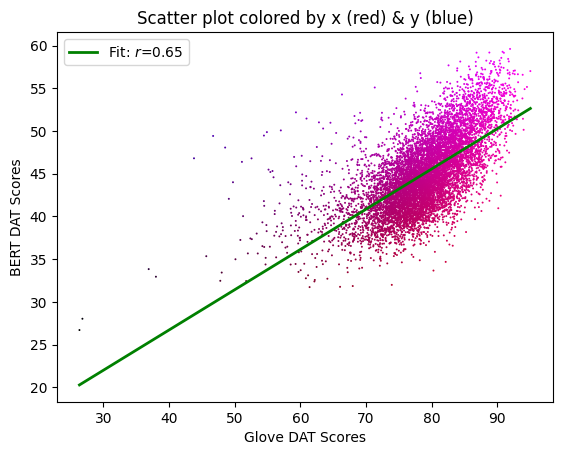

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.asarray(dat_glove)
y = np.asarray(dat_bert_l6)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("BERT DAT Scores")
plt.title("Scatter plot colored by x (red) & y (blue)")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


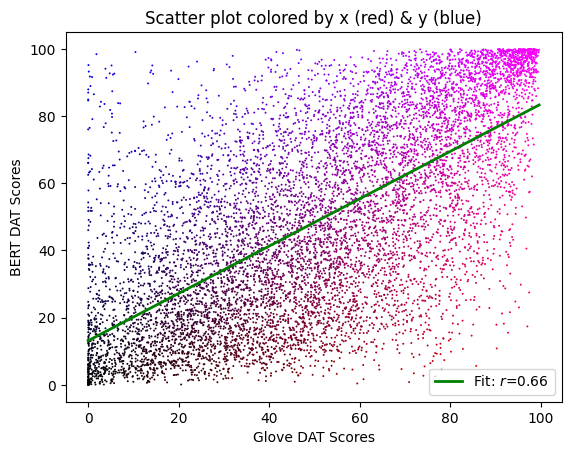

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.asarray(normed_glove)
y = np.asarray(normed_bert_l6)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("BERT DAT Scores")
plt.title("Scatter plot colored by x (red) & y (blue)")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


### Correlation with AUT (study 1)

In [20]:
study1a

,id,age,gender,rt,aut.flexibility.1,aut.flexibility.2,aut.flexibility,aut.originality.1,aut.originality.2,aut.originality,...,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10
0,R_YaGQavcwqIx8Ec9,22,Male,240.170,2.6,2.8,2.7,1.2,1.6,1.4,...,paint,kangaroo,capitalism,aspirin,dictionary,law,flower,mercury,mountain,oxygen
1,R_1ib2WS6c3oC7Yn2,19,Female,73.077,3.2,3.4,3.3,0.6,0.8,0.7,...,cup,book,pen,foot,egg,tree,dog,computer,clock,ring
2,R_PLPzMyaGNx4OGg9,18,Female,52.693,2.2,2.2,2.2,0.4,0.4,0.4,...,pig,girl,programmer,park,music,basketball,dress,sun,river,love
3,R_bORrxwjxVxUfp1n,18,Female,131.879,2.6,2.6,2.6,0.0,0.0,0.0,...,water,pencil,ipad,cloth,light,night,pink,spanish,music,tutorial
4,R_RwVVJ0GFQ9Wi87v,19,Female,111.464,1.6,2.6,2.1,0.0,0.2,0.1,...,shoes,pencil,racquet,stove,bags,lamp,box,laptop,clock,flower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,R_PLjXw8eSTJ9fU5j,25,Female,40.757,2.0,2.2,2.1,0.0,0.6,0.3,...,university,candle,dog,book,car,door,bicycle,fork,projector,microphone
137,R_1IW7aMecSwKs8au,36,Female,140.197,4.6,5.6,5.1,1.8,2.0,1.9,...,facsimile,elderflower,stockings,spatula,hairbrush,salmon,paperclip,exam,brick,coin
138,R_2uX2zMBJmCYpnhu,21,Female,236.600,3.2,4.6,3.9,0.2,1.6,0.9,...,record,faeces,eyeball,fibreglass,lavender,gin,myki,breadcrumbs,horoscope,splinter
139,R_1I6h1PGKj4DgYmO,19,Female,53.898,1.8,2.4,2.1,0.2,1.2,0.7,...,car,charger,head,brick,food,diamond,lily,app,village,forest


In [21]:
study1b

,id,age,gender,rt,aut.flexibility.1,aut.flexibility.2,aut.flexibility,aut.originality.1,aut.originality.2,aut.originality,...,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10
0,R_3koVyM7qEyE4Ypx,19.0,Male,240.109,3.2,3.8,3.5,1.0,2.2,1.6,...,giraffe,face,shoe,trees,TV,paw,ocean,car,banana,handle
1,R_WuE6JAAXCEGO8tH,19.0,Female,240.015,NaN,NaN,NaN,NaN,NaN,NaN,...,cat,desk,theater,egg,pants,weather,hand,hem,uncle,flower
2,R_3QmlC37US0bEQYp,19.0,Female,241.328,NaN,NaN,NaN,NaN,NaN,NaN,...,Rain,Tree,Laptop,Mug,Nail,Rabbit,Potato,Pants,Class,Curtain
3,R_2y1HvqnTKxJ8ymk,18.0,Female,240.056,NaN,NaN,NaN,NaN,NaN,NaN,...,fire,flower,pen,dress,plane,mountain,dog,law,camera,child
4,R_1q1W1V1aS9uWkIG,19.0,Female,240.037,NaN,NaN,NaN,NaN,NaN,NaN,...,boat,people,insect,coffee,clothes,bike,television,wood,laptop,hair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,R_3Op5ssdjxWd5j0d,25.0,Male,240.011,NaN,NaN,NaN,NaN,NaN,NaN,...,Banana,Anger,Ball,Daytime,Apartment,Sea foam,Ear,Butler,Chip,Twirl
281,R_2WZIuyerw3sIMH9,21.0,Female,240.125,NaN,NaN,NaN,NaN,NaN,NaN,...,finger,barn,teacher,garage,hospital,fork,pyjamas,fan,soil,bubblewrap
282,R_4JEt07q4GgsQvlL,20.0,Male,240.119,NaN,NaN,NaN,NaN,NaN,NaN,...,table,cat,space,fly,floor,University,show,number,ion,orange
283,R_29n19Q5HtNPpTWS,47.0,Female,240.150,NaN,NaN,NaN,NaN,NaN,NaN,...,fable,melon,riot,wrist,hope,season,discipline,device,wonder,sleep


In [22]:
flexibility_columns = ["aut.flexibility", "aut.flexibility.2", "aut.flexibility.1"]
flexibility = study1a[flexibility_columns].astype(str).values.tolist()
flexibility_mean = [sum(map(float, row)) / len(row) for row in flexibility]

originality_columns = ["aut.originality", "aut.originality.2", "aut.originality.1"]
originality = study1a[originality_columns].astype(str).values.tolist()
originality_mean = [sum(map(float, row)) / len(row) for row in originality]

fluency_columns = ["aut.fluency", "aut.fluency.2", "aut.fluency.1"]
fluency = study1a[fluency_columns].astype(str).values.tolist()
fluency_mean = [sum(map(float, row)) / len(row) for row in fluency]

words_study1 = study1a[[f'word.{i}' for i in range(1, 11)]].astype(str).values.tolist()

In [23]:
dat_vs_aut_glove = []
dat_vs_aut_bert_l6 = []
dat_vs_aut_bert_l7 = []

for human_response in words_study1:
    dat_vs_aut_glove.append(float(calculate_dat_score(glove, human_response)))
    dat_vs_aut_bert_l6.append(float(calculate_dat_score(bert_l6_word, human_response)))
    dat_vs_aut_bert_l7.append(float(calculate_dat_score(bert_l7_word, human_response)))

Let's plot first of all GloVe vs different metrics from AUT

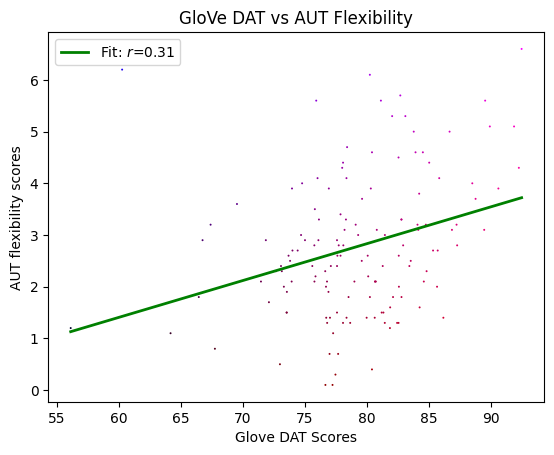

In [24]:
x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(flexibility_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT flexibility scores")
plt.title("GloVe DAT vs AUT Flexibility")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


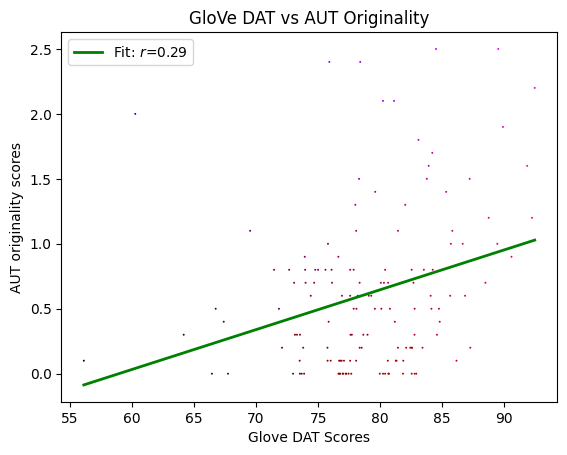

In [25]:
x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT originality scores")
plt.title("GloVe DAT vs AUT Originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


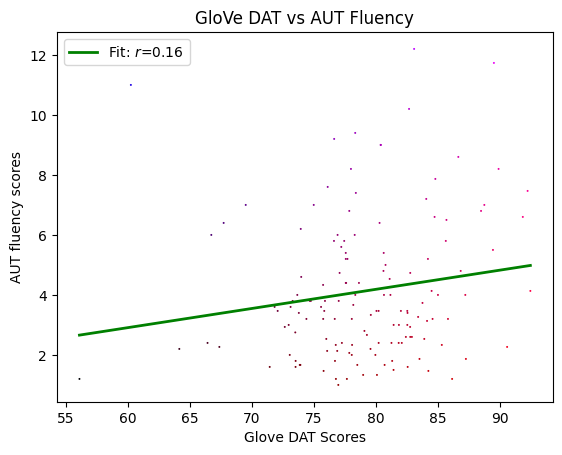

In [26]:
x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(fluency_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT fluency scores")
plt.title("GloVe DAT vs AUT Fluency")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


vs BERT

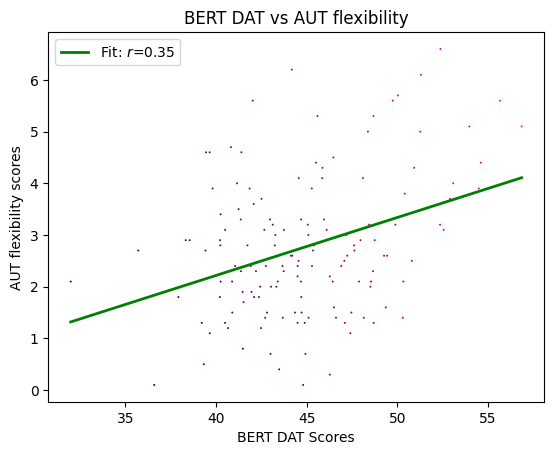

In [27]:
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(flexibility_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT flexibility scores")
plt.title("BERT DAT vs AUT flexibility")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

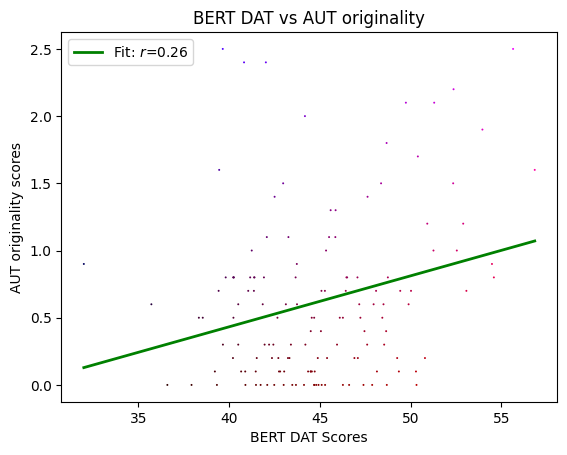

In [28]:
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT originality scores")
plt.title("BERT DAT vs AUT originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

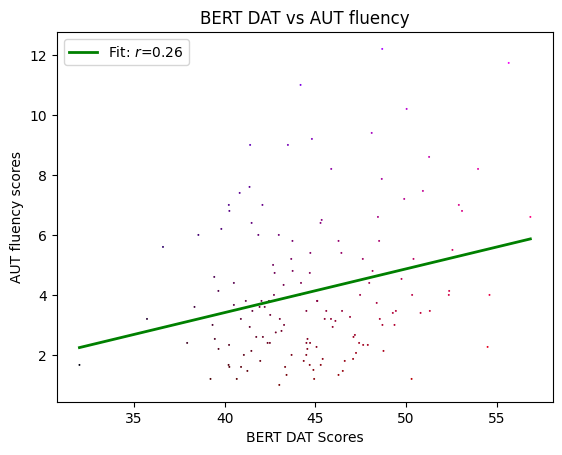

In [29]:
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(fluency_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT fluency scores")
plt.title("BERT DAT vs AUT fluency")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

Continue with other studies

In [30]:
study1a["study"] = "study1a"
study1b["study"] = "study1b"
study1a_filtered = study1a.dropna(subset=['aut.flexibility.1'])
study1b_filtered = study1b.dropna(subset=['aut.flexibility.1'])

In [31]:
study1_combined = pd.concat([study1a_filtered, study1b_filtered], ignore_index=True)
study1_combined

,id,age,gender,rt,aut.flexibility.1,aut.flexibility.2,aut.flexibility,aut.originality.1,aut.originality.2,aut.originality,...,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10,study
0,R_YaGQavcwqIx8Ec9,22.0,Male,240.170,2.6,2.8,2.7,1.2,1.6,1.4,...,kangaroo,capitalism,aspirin,dictionary,law,flower,mercury,mountain,oxygen,study1a
1,R_1ib2WS6c3oC7Yn2,19.0,Female,73.077,3.2,3.4,3.3,0.6,0.8,0.7,...,book,pen,foot,egg,tree,dog,computer,clock,ring,study1a
2,R_PLPzMyaGNx4OGg9,18.0,Female,52.693,2.2,2.2,2.2,0.4,0.4,0.4,...,girl,programmer,park,music,basketball,dress,sun,river,love,study1a
3,R_bORrxwjxVxUfp1n,18.0,Female,131.879,2.6,2.6,2.6,0.0,0.0,0.0,...,pencil,ipad,cloth,light,night,pink,spanish,music,tutorial,study1a
4,R_RwVVJ0GFQ9Wi87v,19.0,Female,111.464,1.6,2.6,2.1,0.0,0.2,0.1,...,pencil,racquet,stove,bags,lamp,box,laptop,clock,flower,study1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,R_3fUWh7czSzoD2Qq,18.0,Female,240.039,3.2,5.4,4.3,3.4,4.6,4.0,...,mouse,candle,wine,garden,person,train,eyelash,painting,books,study1b
362,R_11j9xySW5axFyGC,18.0,Female,240.017,0.2,0.2,0.2,0.0,0.0,0.0,...,apartment,office,gym,refrigerator,dishwasher,window,sun,unicorn,woods,study1b
363,R_3nNVeI3PBrhdEl1,19.0,Female,240.113,5.6,5.2,5.4,3.4,3.4,3.4,...,dot,hamster,pavement,font,psychologist,aluminium,nacho,yellow,toenail,study1b
364,R_2b161aKvodf8pcF,19.0,Female,240.023,0.4,0.6,0.5,0.2,0.0,0.1,...,tv,pencil,statue,tea,people,fruit,plant,gas,lunchbox,study1b


In [32]:
flexibility_columns = ["aut.flexibility", "aut.flexibility.2", "aut.flexibility.1"]
flexibility = study1_combined[flexibility_columns].astype(str).values.tolist()
flexibility_mean = [sum(map(float, row)) / len(row) for row in flexibility]

originality_columns = ["aut.originality", "aut.originality.2", "aut.originality.1"]
originality = study1_combined[originality_columns].astype(str).values.tolist()
originality_mean = [sum(map(float, row)) / len(row) for row in originality]

fluency_columns = ["aut.fluency", "aut.fluency.2", "aut.fluency.1"]
fluency = study1_combined[fluency_columns].astype(str).values.tolist()
fluency_mean = [sum(map(float, row)) / len(row) for row in fluency]

words_study1 = study1_combined[[f'word.{i}' for i in range(1, 11)]].astype(str).values.tolist()

dat_vs_aut_glove = []
dat_vs_aut_bert_l6 = []
dat_vs_aut_bert_l7 = []

for human_response in words_study1:
    dat_vs_aut_glove.append(float(calculate_dat_score(glove, human_response)))
    dat_vs_aut_bert_l6.append(float(calculate_dat_score(bert_l6_word, human_response)))
    dat_vs_aut_bert_l7.append(float(calculate_dat_score(bert_l7_word, human_response)))
    

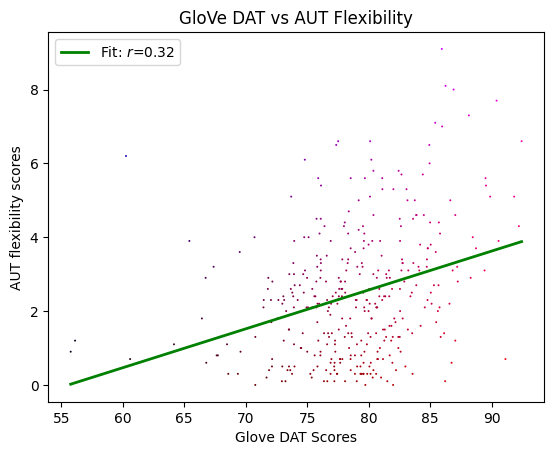

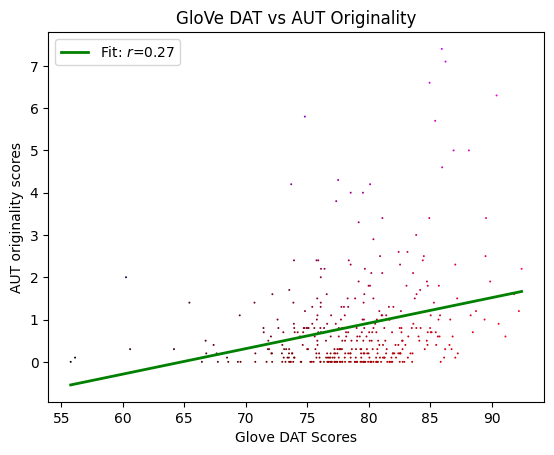

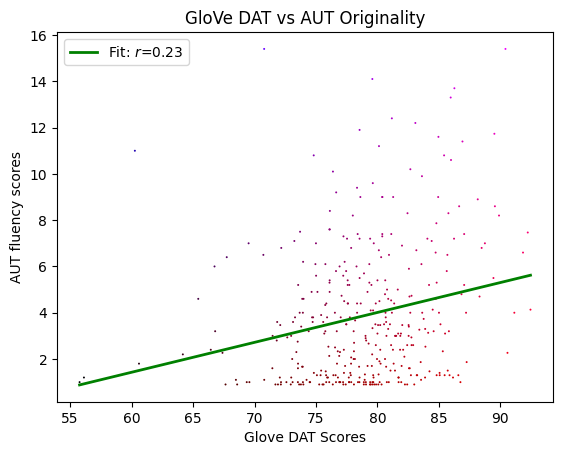

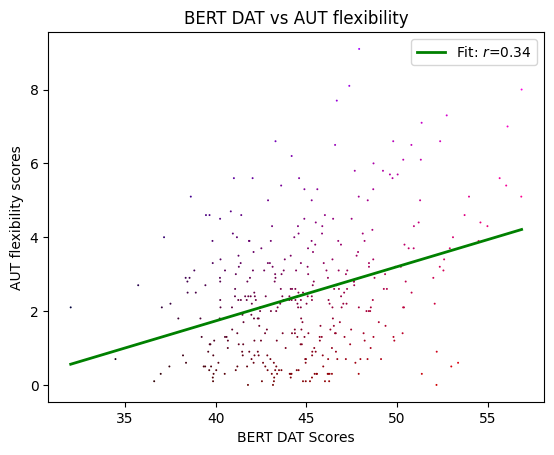

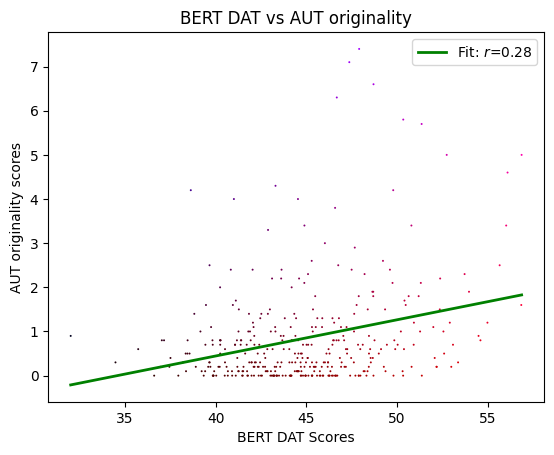

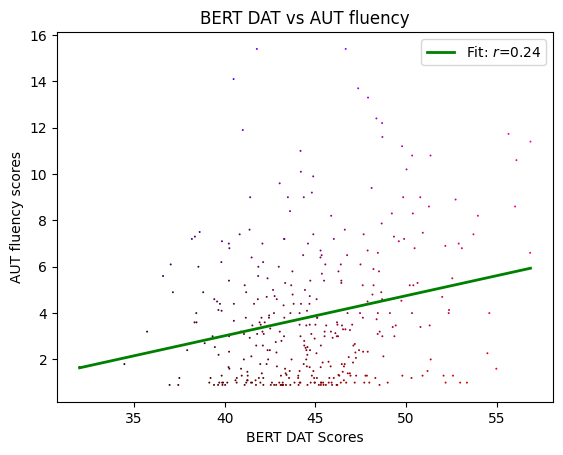

In [33]:
x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(flexibility_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT flexibility scores")
plt.title("GloVe DAT vs AUT Flexibility")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT originality scores")
plt.title("GloVe DAT vs AUT Originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(fluency_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT fluency scores")
plt.title("GloVe DAT vs AUT Originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(flexibility_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT flexibility scores")
plt.title("BERT DAT vs AUT flexibility")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT originality scores")
plt.title("BERT DAT vs AUT originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(fluency_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT fluency scores")
plt.title("BERT DAT vs AUT fluency")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

Last Study (study 2)

In [34]:
study2

,id,age,gender,country,multilingual,aut.originality.1,aut.originality.2,aut.originality,dat,problems.questions.1,...,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10
0,R_OCfAxZo5M0SxNMB,35,Female,Australia,True,NaN,NaN,NaN,83.030700,NaN,...,copper,insect,volcano,trolley,goblet,dog,traffic light,earring,tomb,planet
1,R_1ir4JlMoEeQzoVo,35,Male,Australia,False,NaN,NaN,NaN,80.903128,NaN,...,apple,brick,water,air,star,leg,spanner,typewriter,wall,whale
2,R_1gHhDldnPSA4GDT,18,NaN,NaN,NaN,NaN,NaN,NaN,68.284609,NaN,...,weapon,beach,sky,wind,fire,dragon,cloak,book,fruit,cup
3,R_2ahjZT3xEElN5Da,35,Male,Australia,False,NaN,NaN,NaN,73.696206,NaN,...,ball,nail,rose,stone,sea,fly,relax,sweat,hunger,scorpion
4,R_bEHztu6LDU2uL0R,35,Female,Australia,False,0.5,0.5,0.5,75.083213,0.0,...,sponge,elephant,balloon,sandpaper,orange,air,hair,sandal,tablecloth,freckle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8567,R_cYBvvphVI51O7bX,18,Female,Georgia,True,NaN,NaN,NaN,81.045845,NaN,...,Potato,Ocean,Compassion,Overall,Oxygen,Voice,Confusion,Human,light,hallucination
8568,R_2PBbuHq8rYgGhfv,35,NaN,NaN,NaN,NaN,NaN,NaN,84.801131,NaN,...,Dog,Cup,Aeroplane,Book,Mascara,Screwdriver,Swimming pool,Pants,Trolley,Seaweed
8569,R_2YlBbjNNDCC5OoN,55,NaN,NaN,NaN,NaN,NaN,NaN,82.258960,NaN,...,dog,glasses,guitars,sadness,depression,computer,dandruf,telephone,fingernails,papercut
8570,R_1IABca3qqgjyhtz,35,NaN,NaN,NaN,NaN,NaN,NaN,82.205565,NaN,...,cup,lion,student,entrepreneur,australia,screen,baby,whale,australia,oxygen


In [35]:
study2_filtered = study2.dropna(subset=['aut.originality.1'])
study2_filtered

,id,age,gender,country,multilingual,aut.originality.1,aut.originality.2,aut.originality,dat,problems.questions.1,...,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,word.9,word.10
4,R_bEHztu6LDU2uL0R,35,Female,Australia,False,0.5,0.5,0.50,75.083213,0.0,...,sponge,elephant,balloon,sandpaper,orange,air,hair,sandal,tablecloth,freckle
7,R_3F4huoEdiULkgUH,35,Male,Australia,False,0.5,0.0,0.25,78.967387,2.0,...,Tree,Car,Iceberg,Pilot,Sound,Planet,Elephant,Hat,Slide,Love
14,R_3FUOc2nN3NdPuO5,55,Male,Australia,False,0.5,0.0,0.25,69.728107,0.0,...,tree,car,rock,lake,fish,frige,broom,house,fig,rope
20,R_2Pp27PaBjJSn7BH,55,Male,United Kingdom of Great Britain and Northern I...,False,1.5,1.5,1.50,69.791393,1.0,...,golf club,ant,rock,jelly,concrete,lake,mountain,tree,insect,dinosaur
45,R_2waGiVCvb13AkOa,35,Female,Australia,False,0.5,0.0,0.25,82.800560,1.0,...,floor,game,amber,hair,road,bark,skyscraper,iguana,bottle,chasm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,R_3PLcM39iavHWoIu,13,Male,Australia,False,3.0,3.0,3.00,76.872821,2.0,...,Apple,Rock,book,bag,dog,computer,lamp,Drawer,sticker,bridge
7886,R_27EA8gtAU1oNd7q,65,Male,Australia,True,1.5,1.5,1.50,64.477143,1.0,...,place,round,right,left,glass,sheet,slip,bag,draw,finish
7944,R_21vKXS6NFqM9tbv,18,Female,Australia,False,0.0,0.5,0.25,76.383988,1.0,...,cat,pencil,love,noun,potato,brick,leaf,computer,stone,door
8309,R_1M0Y66IrQ3xxLzz,55,Female,Australia,False,1.5,1.5,1.50,80.085832,2.0,...,Sky,Book,Scales,Kangaroo,Painting,Scarf,Blossom,Crane,Bee,Knife


In [36]:
originality_columns = ["aut.originality", "aut.originality.2", "aut.originality.1"]
originality = study2_filtered[originality_columns].astype(str).values.tolist()
originality_mean = [sum(map(float, row)) / len(row) for row in originality]

words_study1 = study2_filtered[[f'word.{i}' for i in range(1, 11)]].astype(str).values.tolist()

dat_vs_aut_glove = []
dat_vs_aut_bert_l6 = []
dat_vs_aut_bert_l7 = []

for human_response in words_study1:
    dat_vs_aut_glove.append(float(calculate_dat_score(glove, human_response)))
    dat_vs_aut_bert_l6.append(float(calculate_dat_score(bert_l6_word, human_response)))
    dat_vs_aut_bert_l7.append(float(calculate_dat_score(bert_l7_word, human_response)))
    

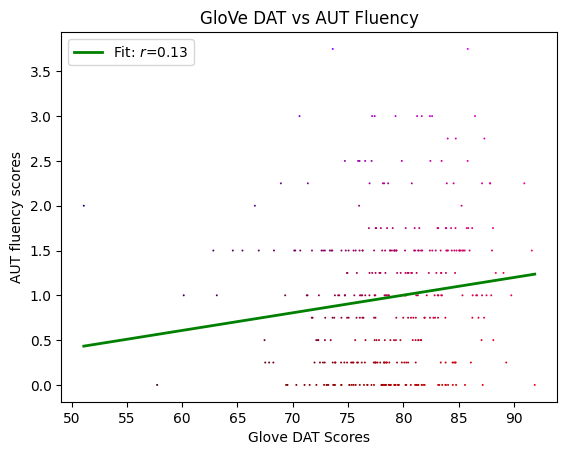

In [37]:
x = np.asarray(dat_vs_aut_glove) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Glove DAT Scores")
plt.ylabel("AUT fluency scores")
plt.title("GloVe DAT vs AUT Fluency")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()


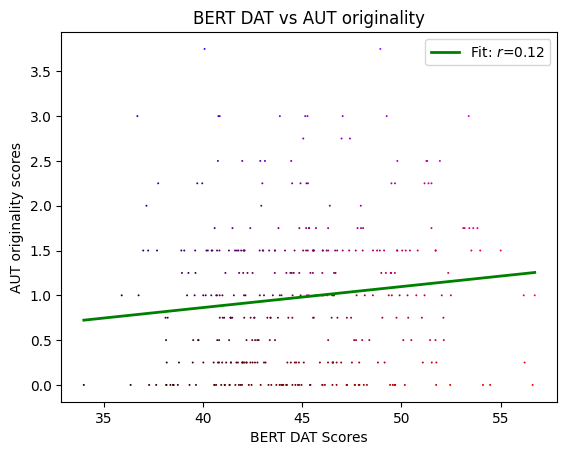

In [38]:
x = np.asarray(dat_vs_aut_bert_l6) 
y = np.asarray(originality_mean)

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("BERT DAT Scores")
plt.ylabel("AUT originality scores")
plt.title("BERT DAT vs AUT originality")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

### Try other embedding models

In [73]:
def make_evaluation(model):
    flexibility_columns = ["aut.flexibility", "aut.flexibility.2", "aut.flexibility.1"]
    flexibility = study1_combined[flexibility_columns].astype(str).values.tolist()
    flexibility_mean = [sum(map(float, row)) / len(row) for row in flexibility]

    originality_columns = ["aut.originality", "aut.originality.2", "aut.originality.1"]
    originality = study1_combined[originality_columns].astype(str).values.tolist()
    originality_mean = [sum(map(float, row)) / len(row) for row in originality]

    fluency_columns = ["aut.fluency", "aut.fluency.2", "aut.fluency.1"]
    fluency = study1_combined[fluency_columns].astype(str).values.tolist()
    fluency_mean = [sum(map(float, row)) / len(row) for row in fluency]
    
    words_study1 = study1_combined[[f'word.{i}' for i in range(1, 11)]].astype(str).values.tolist()

    if isinstance(model, list):
        # Collect per-model score vectors (shape: n_models x n_items)
        per_model_scores = []
        for m in model:
            scores_m = []
            for human_response in tqdm.tqdm(words_study1):
                scores_m.append(float(calculate_dat_score(m, human_response)))
            per_model_scores.append(scores_m)
            
        per_model_scores = np.asarray(per_model_scores, dtype=float)
        dat_vs_aut_model = per_model_scores.mean(axis=0)
        print(str(dat_vs_aut_model))
    else:
        # Single model: just compute the scores
        dat_vs_aut_model = []
        for human_response in tqdm.tqdm(words_study1):
            dat_vs_aut_model.append(float(calculate_dat_score(model, human_response)))
        print(dat_vs_aut_model)
        dat_vs_aut_model = np.asarray(dat_vs_aut_model, dtype=float)

    flexibility_score = np.corrcoef(np.asarray(dat_vs_aut_model), np.asarray(flexibility_mean))[0, 1]
    originality_score = np.corrcoef(np.asarray(dat_vs_aut_model), np.asarray(originality_mean))[0, 1]
    fluency_score = np.corrcoef(np.asarray(dat_vs_aut_model), np.asarray(fluency_mean))[0, 1]

    print(f"Flexibility: {flexibility_score}")
    print(f"Originality: {originality_score}")
    print(f"Fluency: {fluency_score}")


In [63]:
make_evaluation(glove)

100%|██████████| 366/366 [00:00<00:00, 9144.50it/s]

[85.31278848648071, 76.11840686864323, 75.84167392717467, 73.67015278765133, 75.75603097677231, 69.51517876651552, 79.59285179773966, 89.43304383713338, 80.04718554102712, 81.2568601510591, 84.05922231781814, 84.49093865541121, 85.68605744383402, 83.51347103301022, 78.18117271280951, 78.38629969292217, 91.83867880557146, 80.22094916138384, 71.44743502140045, 83.75587838391463, 73.50794547133975, 89.50958673117889, 66.74199536442757, 85.63402579476436, 72.0887107319302, 82.67365615918405, 82.4167976466318, 84.7298915994664, 64.16443389323022, 74.99416377809312, 77.71159932017326, 85.00187197907103, 77.85796120762825, 79.9604910860459, 80.6523946672678, 77.57438677880499, 82.7695463080373, 82.56182239080468, 84.23004324237505, 77.85752388234768, 92.44650128918389, 56.11878557337655, 71.84052863054805, 80.08805909918414, 75.74857815272279, 81.83753976805342, 80.70397354248497, 77.57611387305789, 73.29245580567255, 82.53043323134382, 76.6399668984943, 75.78897794087727, 73.12924510902829, 

In [64]:
make_evaluation(bert_l6_word)

100%|██████████| 366/366 [00:00<00:00, 4216.34it/s]

[47.63211441040039, 41.36922836303711, 44.5014762878418, 44.130191802978516, 40.891109466552734, 42.08069610595703, 42.5097541809082, 52.55157470703125, 49.433658599853516, 44.504844665527344, 49.89402770996094, 39.65280532836914, 45.345367431640625, 47.07592010498047, 40.50621795654297, 40.82554626464844, 56.845428466796875, 51.3049430847168, 40.25722885131836, 48.37739944458008, 42.81562423706055, 55.652462005615234, 38.55043029785156, 48.51087188720703, 41.526023864746094, 50.02721405029297, 47.097328186035156, 48.445953369140625, 39.661277770996094, 40.22773742675781, 47.61140060424805, 54.59345626831055, 47.23734664916992, 43.68614959716797, 50.33001708984375, 44.72001647949219, 44.69084930419922, 43.32963943481445, 46.508522033691406, 40.258087158203125, 52.37138366699219, 40.665687561035156, 38.33613204956055, 46.27277374267578, 43.24626922607422, 42.489906311035156, 44.68544387817383, 43.66776657104492, 42.44112777709961, 46.46825408935547, 44.80683517456055, 41.249908447265625

In [65]:
make_evaluation(bert_l7_word)

100%|██████████| 366/366 [00:00<00:00, 4104.16it/s]

[47.92487716674805, 40.59336853027344, 44.39356994628906, 43.825836181640625, 40.98993682861328, 41.847084045410156, 43.170772552490234, 51.5211181640625, 49.487815856933594, 44.55133819580078, 52.61068344116211, 38.916893005371094, 45.649383544921875, 45.321022033691406, 39.2750244140625, 38.70957946777344, 57.71934509277344, 51.2072868347168, 39.294620513916016, 48.4926643371582, 42.83885192871094, 56.96177673339844, 38.84171676635742, 49.09966278076172, 41.211761474609375, 50.00355911254883, 47.78258514404297, 49.473243713378906, 39.123878479003906, 38.842281341552734, 48.770931243896484, 55.119930267333984, 46.73758316040039, 43.05751419067383, 50.549171447753906, 43.60161209106445, 43.43987274169922, 43.37507629394531, 48.358131408691406, 39.73210525512695, 51.824886322021484, 39.3958625793457, 37.18852233886719, 45.20091247558594, 44.61927032470703, 41.36701965332031, 45.33237075805664, 43.2580451965332, 42.25669479370117, 46.5369873046875, 44.6340217590332, 40.639198303222656, 4

In [44]:
make_evaluation(fastText_model)

  0%|          | 0/366 [00:00<?, ?it/s]

100%|██████████| 366/366 [00:00<00:00, 1111.24it/s]

[86.76837381389406, 83.07742507093482, 82.76571202298834, 83.29268671572208, 78.41301558746233, 70.65114981184402, 83.25092310706775, 91.61484658407669, 84.01604121757879, 84.3924754154351, 86.04022536840704, 87.07791844693324, 87.0671428160535, 85.47591493982408, 85.51532571514447, 82.61689996760752, 89.30864280296696, 81.79460307790174, 78.6820781065358, 84.21047173854377, 84.68490852249994, 85.72855251530807, 77.93022263381216, 87.38825069947376, 78.84679348932372, 86.06194132318099, 83.85625964237585, 85.23933478527599, 76.97422657161951, 80.39310282303227, 84.27569840517309, 85.76095735447275, 84.64653537505203, 80.08661256068282, 82.81335743765035, 85.32010099126232, 87.7894544787705, 86.33303153432078, 82.32878013617463, 80.06828630963962, 89.72050858040652, 62.423767348130546, 79.1731991039382, 84.84528539909257, 81.14449611140621, 86.97064793668687, 83.88260297063324, 81.66833268271552, 79.92169007658958, 83.65465725461641, 83.75095768107307, 82.38865257965193, 81.672835747400

In [45]:
make_evaluation(word2Vec_model)

 85%|████████▍ | 311/366 [00:00<00:00, 1057.35it/s]

Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embed

100%|██████████| 366/366 [00:00<00:00, 1044.75it/s]

Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)
Error in calculating distance: matmul: Input operand 1 doe

In [46]:
make_evaluation(ibm_granite_model)

100%|██████████| 366/366 [13:55<00:00,  2.28s/it]

[32.10666484302945, 29.490843878851997, 32.152178552415634, 31.5278685092926, 30.018520620134144, 25.693663358688358, 30.97668978903029, 31.679283910327488, 31.729412608676487, 32.01531370480855, 32.6854051484002, 31.67829950650533, 33.23282811376784, 32.41506576538086, 30.22290918562147, 30.55888242191739, 33.16130121548971, 32.70666718482971, 29.97841715812683, 33.029927015304565, 30.72194245126512, 33.37062795956929, 28.403874105877346, 34.060658084021675, 30.230593416425915, 32.041705979241264, 32.645450565550064, 33.211835357877945, 26.530510187149048, 29.36819103029039, 30.0776912106408, 31.70496861139933, 31.163426372740005, 29.899692800309925, 30.756691429350113, 31.21937765015496, 31.892416477203366, 33.372258212831284, 34.11522017584907, 29.74698623021444, 33.10557776027255, 28.247758944829304, 30.049690537982514, 31.236455970340305, 30.125387907028202, 32.093843619028725, 31.374062697092693, 30.054325660069786, 30.306699408425224, 33.165153132544624, 31.720807287428116, 31.2

In [47]:
make_evaluation(sbert)

100%|██████████| 366/366 [03:14<00:00,  1.89it/s]

[75.84855410787794, 65.22180596987407, 72.06031719843547, 71.58709499571059, 70.16458895471361, 64.30794305271573, 69.92161154747009, 75.87799337175157, 67.44857178794012, 71.28590451346504, 74.60526360405815, 74.86469758881464, 73.85047435760498, 75.98993274900648, 68.57395847638448, 70.11068012979295, 81.55695570839777, 72.47711539268494, 67.05682039260864, 75.85774223009746, 70.66461033291287, 78.01218191782634, 62.196677393383446, 73.47915371259054, 67.58924603462219, 76.60425557030572, 72.315593957901, 73.83981347084045, 63.62117528915405, 69.33862646420796, 71.47965576913622, 79.69174133406744, 69.06788137223985, 67.27816449271307, 71.42937474780612, 72.9620205031501, 72.3467853334215, 71.01164009835985, 70.78153994348314, 68.19621086120605, 80.27317298783197, 60.00649611155192, 64.60582428508334, 72.16607610384624, 66.95614417394002, 75.95840613047282, 66.00204202863905, 68.6431172158983, 67.03015910254584, 71.18828733762105, 66.97207119729784, 69.39325160450406, 63.334617084927

In [68]:
make_evaluation([glove, bert_l6_word])

[66.47245145 58.74381762 60.17157511 58.9001723  58.32357022 55.79793744
 61.05130299 70.99230927 64.74042207 62.88085241 66.97662501 62.07187199
 65.51571244 65.29469557 59.34369533 59.60592298 74.34205364 65.76294612
 55.85233194 66.06663891 58.16178485 72.58102437 52.64621283 67.07244884
 56.8073673  66.3504351  64.75706292 66.58792248 51.91285583 57.6109506
 62.66149996 69.79766412 62.54765393 61.82332034 65.49120588 61.14720163
 63.73019781 62.94573091 65.36928264 59.05780552 72.40894248 48.39223657
 55.08833034 63.18041642 59.49742369 62.16372304 62.69470871 60.62194022
 57.86679179 64.49934366 60.72340104 58.51944319 57.66747442 52.95797488
 59.8622169  59.88484226 61.29788578 65.61322617 64.31763873 61.66108181
 62.4648362  56.70510531 62.32103384 65.60729187 61.93164232 65.90713307
 58.75330226 61.8614827  61.93753608 62.4135757  68.22178441 62.77000539
 59.3849406  54.61011581 57.21589103 60.52856233 62.22644677 61.05612457
 62.78973711 65.11229169 63.22663849 63.15664116 66.

In [74]:
make_evaluation([glove, bert_l6])

100%|██████████| 366/366 [14:42<00:00,  2.41s/it]

[66.47245908 58.74382334 60.17158846 59.61943537 58.32357785 57.1003323
 61.05131634 70.99231499 64.74042398 62.88086385 66.97663074 63.35219121
 65.40328568 65.29470701 59.34370296 59.60593061 74.3269913  65.76295566
 56.27696878 66.06664845 58.16179248 72.58103391 52.64621665 67.07245838
 56.80737684 67.01788887 66.06103516 66.58793202 51.91286918 57.61095632
 63.27977847 69.13249345 62.54766537 61.82333369 65.49121542 61.14721307
 63.73021688 65.06648515 67.21470348 59.5331435  72.40895774 48.3922461
 55.08833988 63.18042787 59.49742941 63.06272321 62.69472397 60.62194404
 57.86680133 64.49934938 60.72341248 58.51945464 57.66748205 52.95797488
 59.86222263 60.28748928 62.4904517  65.6132338  64.31764827 61.66109326
 62.46484192 56.70512438 62.32104719 66.65182847 61.93165377 65.90713688
 58.75330607 61.86149033 61.93754944 62.41358333 68.25923138 63.91407888
 59.38495396 54.61011772 57.21590248 60.52856805 62.2264544  61.0561322
 62.78974474 65.11230695 63.22664612 66.73909203 67.06

In [69]:
make_evaluation([glove, bert_l6_word, sbert])

[69.597819   60.90314707 64.13448914 63.12914653 62.27057647 58.63460598
 64.00807251 72.62087064 65.64313864 65.68253644 69.51950454 66.33614719
 68.29396641 68.85977463 62.42044972 63.1075087  76.74702099 68.00100255
 59.58716142 69.33034002 62.32939335 74.39141022 55.82970102 69.20801713
 60.40132688 69.76837526 67.27657326 69.00521948 55.81562898 61.52017589
 65.60088523 73.09568986 64.72106308 63.64160173 67.4705955  65.08547459
 66.60239365 65.63436731 67.17336841 62.10394063 75.03035265 52.26365642
 58.26082832 66.17563632 61.98366385 66.76195074 63.79715315 63.29566589
 60.92124756 66.72899155 62.80629109 62.144046   59.55652198 57.29860479
 61.4644863  61.62399364 63.51619518 67.44051519 65.76012951 64.05905616
 65.54060955 60.09126226 65.5555165  69.65719317 64.18553858 68.00855216
 61.0691193  65.0214547  64.98875756 65.34679346 70.46589439 66.31142938
 62.60764798 57.40727813 58.94298409 63.12845804 66.14040099 62.50726652
 66.36749951 68.76455218 65.89428618 67.65754936 70

In [70]:
make_evaluation([glove, bert_l6_word, bert_l7_word, fastText_model, word2Vec_model, ibm_granite_model, sbert])

Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for spokeslady
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for aglet
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embedding for icecube
Couldn't find embed

## Conclusions

**Study1** (n=141)
|       | Flexibility | Originality | Fluency |
|-------|-------------|-------------|---------|
| Glove | 0.34        | 0.32        | 0.15    |
| BERT  | 0.37        | 0.29        | 0.19    |

**Study1a + Study1b** (n=366)
|       | AUT Flexibility | AUT Originality | AUT Fluency |
|-------|-------------|-------------|---------|
| GloVe                                      | 0.3205        | 0.2717        | 0.2317    |
| BERT (Layer 6)                             | **0.3415**    | **0.2826**    | **0.2369**|
| BERT (Layer 7)                             | 0.3203        | 0.2590        | 0.2290    |
| FastText                                   | 0.2151        | 0.2011        | 0.1686    |
| Word2Vec                                   | 0.1371        | 0.1417        | 0.1431    |
| Granite-Embedding-278m-multilingual        | 0.2411        | 0.2018        | 0.1282    |
| Sentence-BERT                              | 0.3028        | 0.2484        | 0.2025    |

**Study1a + Study1b** (n=366)
|       | AUT Flexibility | AUT Originality | AUT Fluency |
|-------|-------------|-------------|---------|
| GloVe                                      | 0.3205        | 0.2717        | 0.2317    |
| BERT (Layer 6)                             | 0.3415        | 0.2826        | 0.2369    |
| GloVe + BERT_L6                            | **0.3653**    | **0.3064**    | **0.2593**|
| GloVe + BERT_L6 + Sentence-BERT            | 0.3616        | 0.3014        | 0.2525    |
| All embedding models from Table 1 combined | 0.3383        | 0.2879        | 0.2450    |

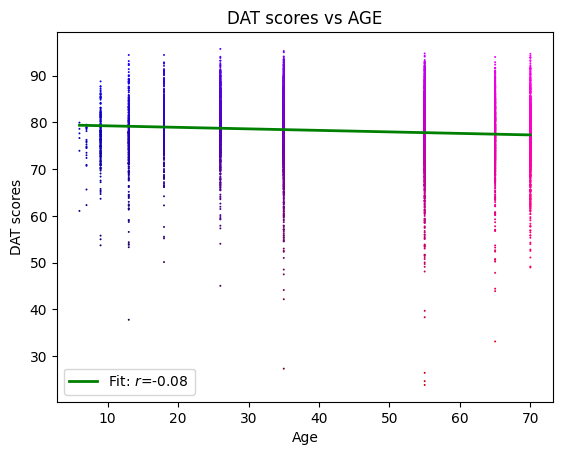

In [ ]:
x = np.asarray(study2["age"].to_list()) 
y = np.asarray(study2["dat"].to_list())

nx = (x - x.min()) / (x.max() - x.min())
ny = (y - y.min()) / (y.max() - y.min())

colors = np.vstack([nx, np.zeros_like(nx), ny]).T

plt.scatter(x, y, c=colors, s=2, edgecolors='none')
plt.xlabel("Age")
plt.ylabel("DAT scores")
plt.title("DAT scores vs AGE")

model = LinearRegression().fit(x.reshape(-1,1), y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = model.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color='green', linewidth=2, label=f"Fit: $r$={np.corrcoef(x,y)[0,1]:.2f}")
plt.legend()

plt.show()

I think moving forward I will only be assessing DAT performance using an ensemble of GloVe and BERT L6. We can clearly see that there is a higher correlation with the combined GloVe and Bert Word Embeddings scores.

## Test granite-embedding-278m-multilingual

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

MODEL_ID = "ibm-granite/granite-embedding-278m-multilingual"

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
model = AutoModel.from_pretrained(MODEL_ID).to(device).eval()

@torch.inference_mode()
def encode_texts(texts, batch_size: int = 32, max_length: int = 512):
    """Returns L2-normalized sentence embeddings."""
    out = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc = tokenizer(
            batch, padding=True, truncation=True, max_length=max_length,
            return_tensors="pt"
        ).to(device)
        # Forward pass
        outputs = model(**enc)
        # CLS pooling (embedding = [CLS] token)
        cls = outputs.last_hidden_state[:, 0, :]
        # L2 normalize
        cls = torch.nn.functional.normalize(cls, p=2, dim=1)
        out.append(cls.detach().cpu())
    return torch.vstack(out)

# Example
texts = [
    "Who wrote 'Achy Breaky Heart'?",
    "Achy Breaky Heart was written by Don Von Tress.",
    "I love making pizza on weekends."
]

emb = encode_texts(texts)          # shape: [len(texts), 768]
sim = emb @ emb.T                  # cosine similarity matrix (because vectors are normalized)
print(sim)


tensor([[1.0000, 0.9255, 0.5057],
        [0.9255, 1.0000, 0.5206],
        [0.5057, 0.5206, 1.0000]])
